In [8]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import plotly.express as pt

In [87]:
data = pd.read_csv(r"D:\Datasets\train.csv", delimiter = ',', encoding = 'utf-8')
data_test = pd.read_csv(r"D:\Datasets\test.csv", delimiter = ',', encoding = 'utf-8')

In [6]:
df = pd.DataFrame(data)


In [88]:
df_test = pd.DataFrame(data_test)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

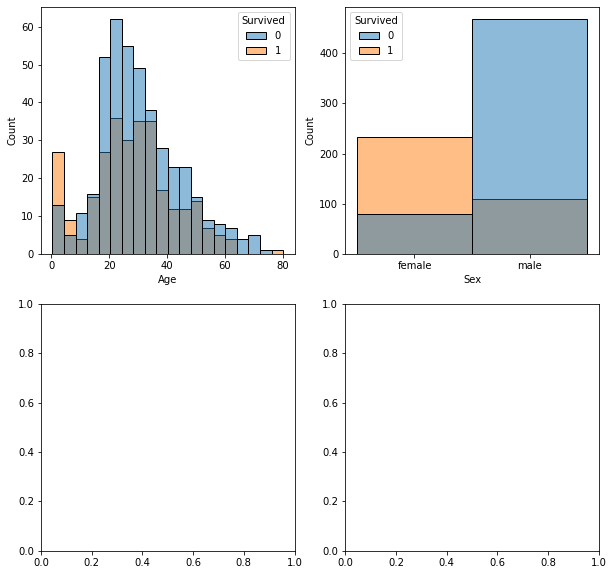

In [29]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
sea.histplot(data = df, x = 'Age', hue = 'Survived', ax = axes[0][0])
sea.histplot(data = df, x = 'Sex',  ax = axes[0][1], hue = 'Survived')

In [33]:
pt.histogram(df, x = 'Age', color = 'Survived', pattern_shape = 'Sex' )

In [32]:
pt.histogram(df, x = 'Sex', color = 'Survived')

In [19]:
df.drop('Sex]', axis = 1, inplace = True)

In [36]:
pt.histogram(df, x = 'Pclass', color = 'Survived', nbins=20)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
pt.histogram(df, x = 'Embarked', color = 'Survived', nbins = 35)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [50]:
X = df[['Sex','Pclass','Embarked','Fare']]
y = df[['Survived']]

X[['Sex','Pclass','Embarked']] = X[['Sex','Pclass','Embarked']].astype('category')

C:\Users\1\AppData\Local\Temp\ipykernel_14820\516749521.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
trans = make_column_transformer((OneHotEncoder(), ['Sex','Pclass','Embarked']), remainder = 'passthrough')

In [78]:
transformed = trans.fit_transform(X)

In [103]:
X = pd.DataFrame(transformed, columns=trans.get_feature_names())

C:\Users\1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [82]:
transformed_df.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_1,onehotencoder__x1_2,onehotencoder__x1_3,onehotencoder__x2_C,onehotencoder__x2_Q,onehotencoder__x2_S,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.9250
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0500


In [104]:
model = DecisionTreeClassifier()

In [105]:
model = model.fit(X,y)

In [98]:
X_test = df_test[['Sex','Pclass','Embarked','Fare']]

In [99]:
transformed_2 = trans.fit_transform(X_test)

In [110]:
X_df_test = pd.DataFrame(transformed_2, columns = trans.get_feature_names())

C:\Users\1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [112]:
Sur_pred = model.predict(X_df_test)

In [117]:
To_submit = df_test['PassengerId']

In [118]:
To_submit['Survived'] = Sur_pred

C:\Users\1\AppData\Local\Temp\ipykernel_14820\1369131176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
final = pd.DataFrame({'PassengerID': df_test['PassengerId'], 'Survived': Sur_pred})

In [125]:
final.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
final.to_excel("D:\Datasets\Answers.xlsx")
print('Nice')

Nice
